In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import os

import statsmodels.formula.api as smf

# Load data

In [7]:
report_folder = "Reports"
report_name = "wandb_export_2022-12-06T18_41_14.378-05_00.csv"
report_name = "wandb_export_2022-12-06T18_41_14.378-05_00_ResNet1D.csv"

# sweep_name = "20221004-ecg_p40-sup-clocs1d-bayes-norm01-wd-b4.yaml"
report_df = pd.read_csv(os.path.join(report_folder, report_name))
report_df

,Name,State,Created,End Time,Runtime,Sweep,Hostname,ID,lr,classifier_lr,dim_feedforward,embedding_dim,aug_prob,optimizer,seed,corresponding_train_auroc,max_val_auroc,test_auroc,epoch
0,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-07T01:35:53.000Z,2022-12-07T05:06:27.000Z,12634,4lzvtufi,beast3,zblh2vfg,0.005,0.010,128.0,256,0.25,adam,4,0.788178,0.962624,0.806597,50.0
1,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-07T09:36:10.000Z,2022-12-09T05:54:16.000Z,159486,4lzvtufi,beast3,1f8ixodk,0.001,0.001,128.0,256,1.75,adam,2,0.762374,0.962165,0.855120,49.0
2,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-07T09:20:09.000Z,2022-12-08T06:30:26.000Z,76217,4lzvtufi,beast1,cvta6fpo,0.005,0.001,128.0,256,1.00,adam,1,0.786207,0.960785,0.809045,65.0
3,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-07T01:53:23.000Z,2022-12-07T06:07:59.000Z,15276,4lzvtufi,beast4,3jpc748b,0.001,0.001,128.0,256,0.50,adam,1,0.787269,0.956084,0.755865,67.0
4,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-07T09:23:27.000Z,2022-12-07T23:15:14.000Z,49907,4lzvtufi,beast3,bqtpr3x8,0.005,0.001,128.0,256,1.25,adam,0,0.767734,0.954530,0.810885,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-07T08:33:21.000Z,2022-12-07T09:19:59.000Z,2798,4lzvtufi,ankitlab2,46wjokrv,0.001,0.010,128.0,256,0.75,sgd,3,0.688868,0.634946,NaN,5.0
349,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-06T22:11:00.000Z,2022-12-07T01:03:48.000Z,10368,4lzvtufi,beast3,la7gmpi4,0.005,0.010,128.0,256,0.00,sgd,4,0.763482,0.621029,0.755342,41.0
350,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-06T22:10:58.000Z,2022-12-07T02:33:57.000Z,15779,4lzvtufi,ankitlab2,3xmiyw5e,0.001,0.010,128.0,256,0.00,sgd,4,0.795936,0.607983,0.826496,56.0
351,supervised-ResNet18_1D-ECG_normalized-20221204...,finished,2022-12-07T09:23:25.000Z,2022-12-08T01:41:07.000Z,58662,4lzvtufi,beast3,xv89u4zd,0.001,0.001,128.0,256,1.25,sgd,1,0.647184,0.539378,NaN,4.0


In [8]:
for column in ["lr", "classifier_lr", "optimizer", "aug_prob", "seed"]:
    print(column, len(report_df[column].unique()), report_df[column].unique())

lr 2 [0.005 0.001]
classifier_lr 2 [0.01  0.001]
optimizer 2 ['adam' 'sgd']
aug_prob 9 [0.25 1.75 1.   0.5  1.25 0.   2.   1.5  0.75]
seed 5 [4 2 1 0 3]


# Analyze Results

In [9]:
selected_columns = ["lr", "classifier_lr", "optimizer", "aug_prob", "seed", "max_val_auroc", "test_auroc"]
report_df_selected = report_df[selected_columns]

In [10]:
report_df_selected

,lr,classifier_lr,optimizer,aug_prob,seed,max_val_auroc,test_auroc
0,0.005,0.010,adam,0.25,4,0.962624,0.806597
1,0.001,0.001,adam,1.75,2,0.962165,0.855120
2,0.005,0.001,adam,1.00,1,0.960785,0.809045
3,0.001,0.001,adam,0.50,1,0.956084,0.755865
4,0.005,0.001,adam,1.25,0,0.954530,0.810885
...,...,...,...,...,...,...,...
348,0.001,0.010,sgd,0.75,3,0.634946,NaN
349,0.005,0.010,sgd,0.00,4,0.621029,0.755342
350,0.001,0.010,sgd,0.00,4,0.607983,0.826496
351,0.001,0.001,sgd,1.25,1,0.539378,NaN


## Find the best performing runs based on `max_val_auroc` for each (`aug_prob`, `seed`)

In [11]:
# report_df_selected_summary = report_df_selected.groupby(["aug_prob", "seed"]).agg({"max_val_auroc": "max"})
# report_df_selected_summary_sorted = report_df_selected_summary.sort_values(by=["max_val_auroc"], ascending=False).reset_index()
# report_df_selected_summary
# best_lr = report_df_selected_summary_sorted.reset_index()["lr"].values[0]
# best_classifier_lr = report_df_selected_summary_sorted.reset_index()["classifier_lr"].values[0]
# best_optimizer = report_df_selected_summary_sorted.reset_index()["optimizer"].values[0]
# # best_lr, best_classifier_lr, best_optimizer
# report_df_selected_summary_sorted

In [12]:
report_df_selected_tuned = report_df_selected.loc[report_df_selected.groupby(["aug_prob", "seed"])["max_val_auroc"].idxmax()]
report_df_selected_tuned


,lr,classifier_lr,optimizer,aug_prob,seed,max_val_auroc,test_auroc
44,0.005,0.010,adam,0.00,0,0.936420,0.902662
230,0.005,0.001,adam,0.00,1,0.895033,0.743187
7,0.005,0.010,adam,0.00,2,0.951542,0.778571
143,0.005,0.010,adam,0.00,3,0.917894,0.879465
156,0.005,0.001,adam,0.00,4,0.915776,0.909790
36,0.001,0.010,adam,0.25,0,0.939057,0.884666
30,0.005,0.010,adam,0.25,1,0.942096,0.833891
17,0.001,0.001,adam,0.25,2,0.946690,0.894471
38,0.005,0.010,adam,0.25,3,0.937859,0.790710
0,0.005,0.010,adam,0.25,4,0.962624,0.806597


In [13]:
report_df_selected_tuned_summary = report_df_selected_tuned.groupby(["aug_prob"]).agg({"test_auroc": "mean"}).reset_index()
report_df_selected_tuned_summary

,aug_prob,test_auroc
0,0.00,0.842735
1,0.25,0.842067
2,0.50,0.826291
3,0.75,0.874727
4,1.00,0.825429
5,1.25,0.850408
6,1.50,0.847438
7,1.75,0.854708
8,2.00,0.854476


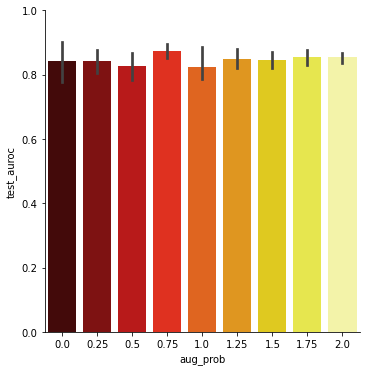

In [14]:
g = sns.catplot(data=report_df_selected_tuned,
                x="aug_prob", y="test_auroc",
                kind="bar", palette="hot")
for ax_row in g.axes:
    for ax in ax_row:
        ax.set_ylim(0, 1.0)

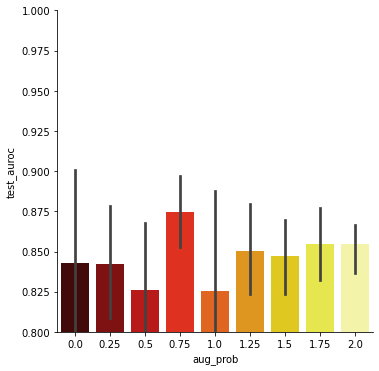

In [16]:
g = sns.catplot(data=report_df_selected_tuned,
                x="aug_prob", y="test_auroc",
                kind="bar", palette="hot")
for ax_row in g.axes:
    for ax in ax_row:
        ax.set_ylim(0.8, 1.0)

## 'max_val_auroc' vs 'test_auroc' plot

In [17]:
report_df_selected.sort_values(by=["max_val_auroc"], ascending=False)

,lr,classifier_lr,optimizer,aug_prob,seed,max_val_auroc,test_auroc
0,0.005,0.010,adam,0.25,4,0.962624,0.806597
1,0.001,0.001,adam,1.75,2,0.962165,0.855120
2,0.005,0.001,adam,1.00,1,0.960785,0.809045
3,0.001,0.001,adam,0.50,1,0.956084,0.755865
4,0.005,0.001,adam,1.25,0,0.954530,0.810885
...,...,...,...,...,...,...,...
348,0.001,0.010,sgd,0.75,3,0.634946,NaN
349,0.005,0.010,sgd,0.00,4,0.621029,0.755342
350,0.001,0.010,sgd,0.00,4,0.607983,0.826496
351,0.001,0.001,sgd,1.25,1,0.539378,NaN


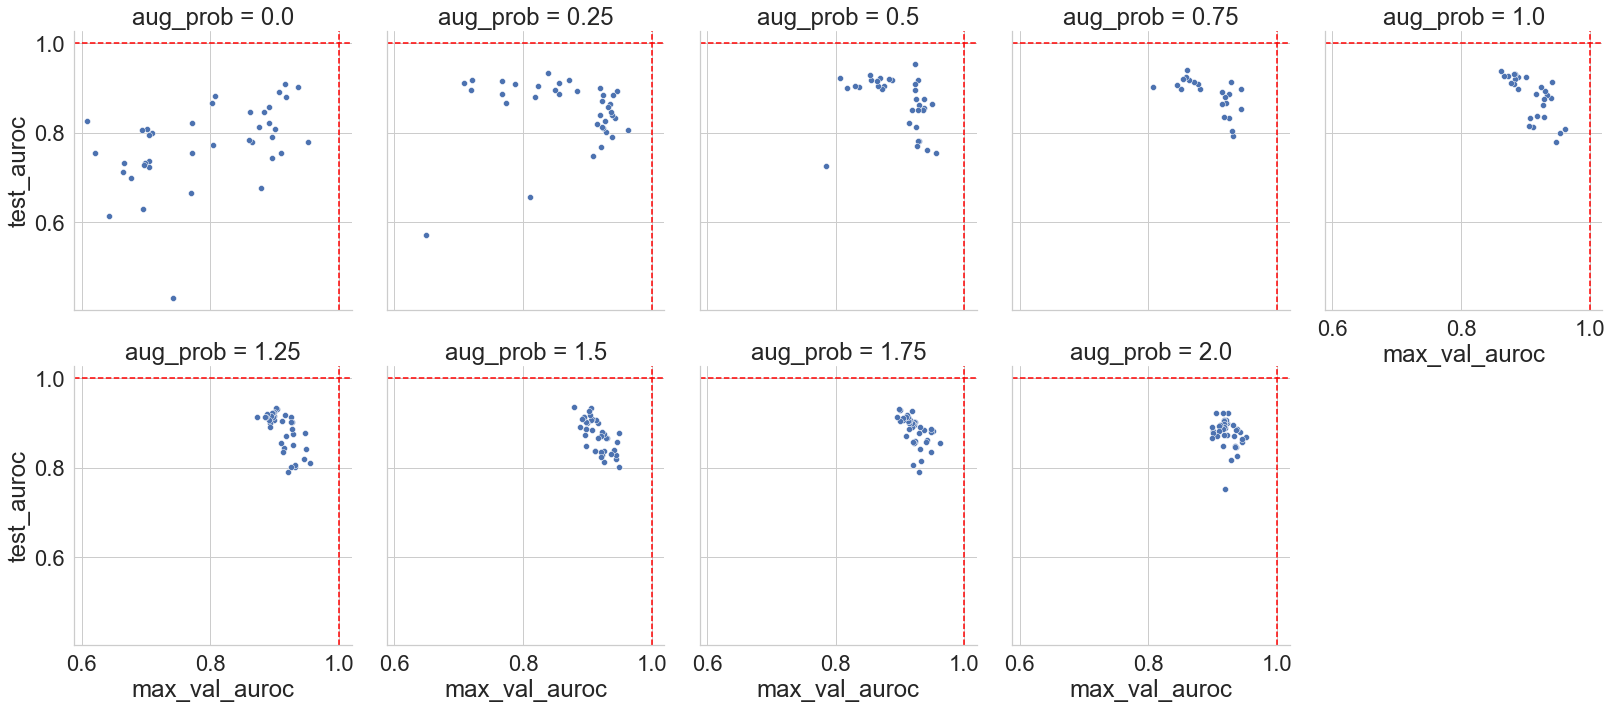

In [18]:
sns.set(style="whitegrid", font_scale=2)
g = sns.relplot(data=report_df_selected,
                x="max_val_auroc", y="test_auroc",
                col="aug_prob", palette="hot",
                col_wrap=5,
                aspect=0.9, height=5)
for i, ax in enumerate(g.axes):
#     for j, ax in enumerate(ax_row):
    ax.axhline(1.0, color="#FF0000", linestyle="--")
    ax.axvline(1.0, color="#FF0000", linestyle="--")

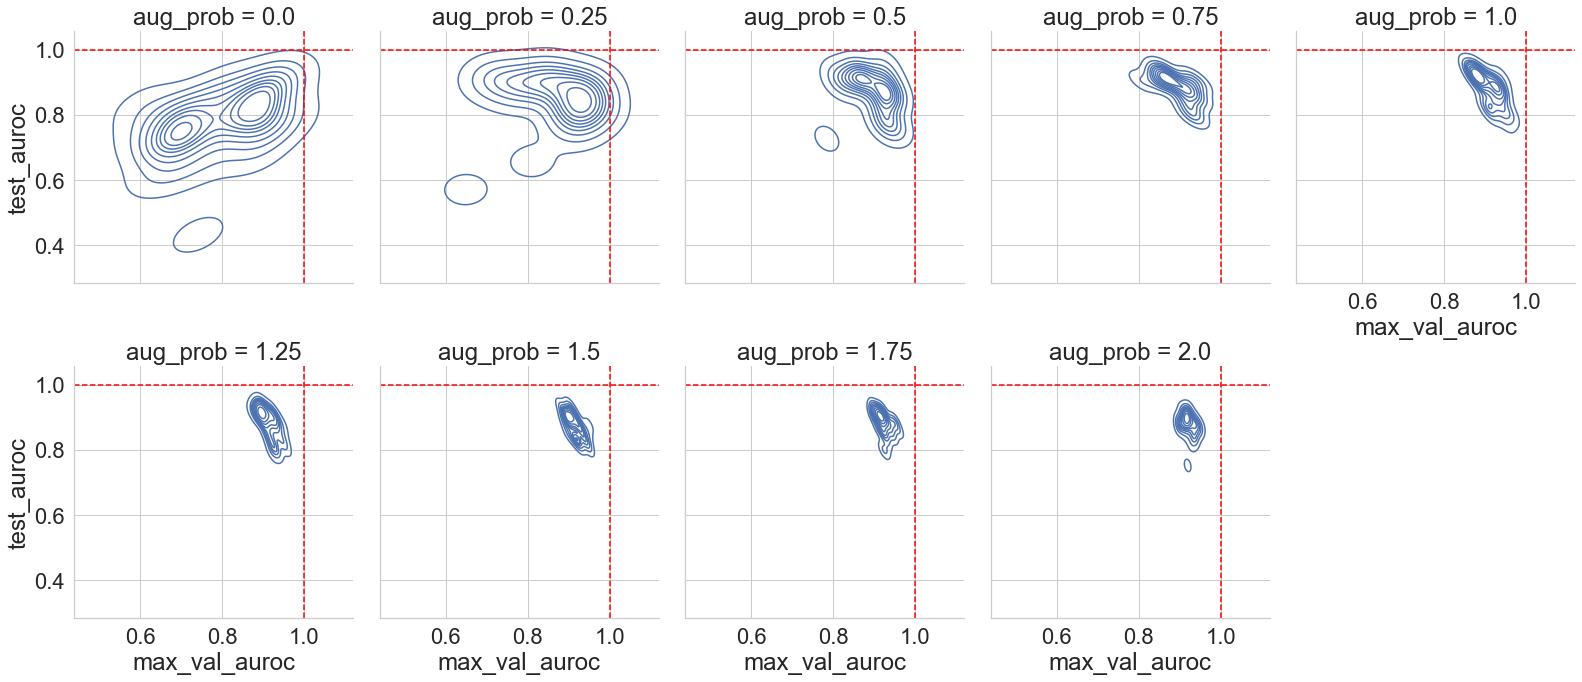

In [19]:
g = sns.FacetGrid(report_df_selected, col="aug_prob", col_wrap=5, height=5, aspect=0.9)
g.map(sns.kdeplot, "max_val_auroc", "test_auroc")
for i, ax in enumerate(g.axes):
#     for j, ax in enumerate(ax_row):
    ax.axhline(1.0, color="#FF0000", linestyle="--")
    ax.axvline(1.0, color="#FF0000", linestyle="--")
        

## Find the best performing subgroup with the same `lr`, `claasifier_lr` and `optimizer`

In [54]:
# report_df_selected_summary = report_df_selected.groupby(["lr", "classifier_lr", "optimizer"]).agg({"max_val_auroc": "mean"})
# report_df_selected_summary_sorted = report_df_selected_summary.sort_values(by=["test_auroc"], ascending=False)
# best_lr = report_df_selected_summary_sorted.reset_index()["lr"].values[0]
# best_classifier_lr = report_df_selected_summary_sorted.reset_index()["classifier_lr"].values[0]
# best_optimizer = report_df_selected_summary_sorted.reset_index()["optimizer"].values[0]
# # best_lr, best_classifier_lr, best_optimizer
# report_df_selected_summary_sorted

In [55]:
# report_df_selected_filtered = report_df_selected.query(
#     f"lr == {best_lr} and classifier_lr == {best_classifier_lr} and optimizer == '{best_optimizer}'").reset_index(drop=True)
# report_df_selected_filtered = report_df_selected_filtered.sort_values(by=["aug_prob", "seed"])
# report_df_selected_filtered


In [56]:
# g = sns.catplot(data=report_df_selected,
#                 x="aug_prob", y="test_auroc",
#                 kind="bar", palette="hot")
# for ax_row in g.axes:
#     for ax in ax_row:
#         ax.set_ylim(0, 1.0)

In [57]:
# g = sns.catplot(data=report_df_selected,
#                 x="aug_prob", y="test_auroc",
#                 kind="bar", palette="hot")
# for ax_row in g.axes:
#     for ax in ax_row:
#         ax.set_ylim(0.85, 1.0)

In [58]:
# g = sns.catplot(data=report_df_selected_filtered,
#                 x="aug_prob", y="test_auroc",
#                 kind="bar", palette="hot")
# for ax_row in g.axes:
#     for ax in ax_row:
#         ax.set_ylim(0, 1.0)

In [59]:
# g = sns.catplot(data=report_df_selected_filtered,
#                 x="aug_prob", y="test_auroc",
#                 kind="bar", palette="hot")
# for ax_row in g.axes:
#     for ax in ax_row:
#         ax.set_ylim(0.85, 1.0)

## Find the best performing subgroup with the same `lr`, `claasifier_lr`, `optimizer` and 'aug_prob'

In [60]:
selected_columns = ["lr", "classifier_lr", "optimizer", "aug_prob", "seed", "test_auroc"]
report_df_selected = report_df[selected_columns]
report_df_selected_summary = report_df_selected.groupby(["lr", "classifier_lr", "optimizer", "aug_prob"]).agg({"test_auroc": "mean"})
report_df_selected_summary_sorted = report_df_selected_summary.sort_values(by=["test_auroc"], ascending=False)
best_lr = report_df_selected_summary_sorted.reset_index()["lr"].values[0]
best_classifier_lr = report_df_selected_summary_sorted.reset_index()["classifier_lr"].values[0]
best_optimizer = report_df_selected_summary_sorted.reset_index()["optimizer"].values[0]
# best_lr, best_classifier_lr, best_optimizer
report_df_selected_summary_sorted

test_auroc
lr    classifier_lr optimizer aug_prob            
0.005 0.001         adam      1.00        0.942020
                              1.25        0.941664
      0.010         adam      1.00        0.940092
0.001 0.001         adam      1.75        0.939367
0.005 0.010         adam      0.25        0.938835
...                                            ...
0.001 0.001         sgd       1.25        0.819811
0.005 0.001         adam      0.00        0.810866
0.001 0.010         sgd       0.00        0.772814
      0.001         sgd       0.00        0.735040
0.005 0.001         sgd       0.00        0.566934

[72 rows x 1 columns]

# Summarize Report

In [61]:
# report_df_summary = report_df.groupby(["embedding_dim", "weight_decay", "lr", "classifier_lr"]).agg({
#     "val_auroc": "mean"
# }).reset_index()
# report_df_summary

KeyError: 'weight_decay'

In [ ]:
# report_df.sort_values(by=["val_auroc"], ascending=False).head(32)

In [ ]:
# g = sns.factorplot(data=report_df, x="embedding_dim", y="val_auroc", hue="weight_decay", col="classifier_lr")

In [ ]:
# model = smf.ols("val_auroc ~ embedding_dim + classifier_lr + weight_decay", report_df, ).fit()
# model.summary()

In [ ]:
# report_df_tmp = report_df.copy()
# report_df_tmp["weight_decay"] = report_df_tmp["weight_decay"] + 1e-7
# model = smf.ols("val_auroc ~ np.log(embedding_dim) + np.log(classifier_lr) + np.log(weight_decay)", report_df_tmp, ).fit()
# model.summary()

# XAI Tools

In [62]:
import math

In [63]:
report_df_sorted = report_df.sort_values(by=["max_val_auroc"], ascending=False)
report_df_sorted.head()

,Name,State,Created,End Time,Runtime,Sweep,Hostname,ID,lr,classifier_lr,embedding_dim,dim_feedforward,optimizer,seed,aug_prob,test_auroc,max_val_auroc,corresponding_train_auroc,epoch
0,supervised-clocsCNN_1D-ECG_normalized-20221202...,finished,2022-12-04T06:03:57.000Z,2022-12-04T12:10:22.000Z,21985,fjtvwtqe,beast3,cqpywv9j,0.005,0.001,256,128,sgd,2,2.00,0.939464,0.950550,0.743956,61
1,supervised-clocsCNN_1D-ECG_normalized-20221202...,finished,2022-12-04T05:19:55.000Z,2022-12-04T13:01:23.000Z,27688,fjtvwtqe,beast1,g09je3xq,0.005,0.001,256,128,adam,4,2.00,0.951888,0.950173,0.739453,44
2,supervised-clocsCNN_1D-ECG_normalized-20221202...,finished,2022-12-03T06:01:52.000Z,2022-12-04T05:19:37.000Z,83865,fjtvwtqe,beast1,s6qzuo6i,0.005,0.001,256,128,adam,0,1.25,0.950647,0.949504,0.762973,199
3,supervised-clocsCNN_1D-ECG_normalized-20221202...,finished,2022-12-03T12:51:25.000Z,2022-12-03T21:38:59.000Z,31654,fjtvwtqe,ankitlab2,ln944xn9,0.005,0.001,256,128,sgd,2,1.50,0.913096,0.948688,0.755173,64
4,supervised-clocsCNN_1D-ECG_normalized-20221202...,finished,2022-12-04T08:30:30.000Z,2022-12-04T14:12:25.000Z,20515,fjtvwtqe,beast3,nd75tvsb,0.005,0.010,256,128,adam,1,2.00,0.935905,0.946020,0.749772,70


In [64]:
best_run_ID = report_df_sorted["ID"].values[0]
best_run_ID

'cqpywv9j'

## Load data

In [65]:
data_folder = ""
data_chunk_folder = "ecg-pat40-tch-sinus_jet_lead2"
data_chunk_list = []
for data_filename in os.listdir(os.path.join(data_folder, data_chunk_folder)):
    data_chunk_list.append(pd.read_csv(os.path.join(data_folder, data_chunk_folder, data_filename)))
feature_with_ecg_df_train_single_lead = pd.concat(data_chunk_list, axis=0)

In [66]:
feature_with_ecg_df_val_single_lead = pd.read_csv("feature_with_ecg_df_val_lead2.csv")
feature_with_ecg_df_test_single_lead = pd.read_csv("feature_with_ecg_df_test_lead2.csv")
feature_with_ecg_df_test_single_lead

,cycle_ID,patient_ID,interval_ID,block_ID,channel_ID,segment_ID,start_ID,end_ID,r_ID,r_t,...,ecg295,ecg296,ecg297,ecg298,ecg299,ecg300,r_ID_abs,r_ID_abs_ref,selected,duration
0,1,771495,8748755,1,2,1,1,66705,820,2015-12-22 23:12:04.099549952,...,1.290715,1.403295,1.606575,1.857944,2.039397,2.014317,820,820,True,277.528
1,2,771495,8748755,1,2,1,1,66705,907,2015-12-22 23:12:04.461459968,...,1.152530,1.248552,1.434638,1.692337,1.924521,1.995100,907,907,True,277.528
2,3,771495,8748755,1,2,1,1,66705,994,2015-12-22 23:12:04.823380224,...,0.954466,1.053145,1.247815,1.520770,1.775172,1.874207,994,994,True,277.528
3,4,771495,8748755,1,2,1,1,66705,1085,2015-12-22 23:12:05.201929984,...,1.468770,1.449762,1.533679,1.723174,1.924213,1.983855,1085,1085,True,277.528
4,5,771495,8748755,1,2,1,1,66705,1167,2015-12-22 23:12:05.543040000,...,1.150959,1.294285,1.518599,1.771597,1.948649,1.938984,1167,1167,True,277.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114407,308,536886,8748726,1,2,2,4442,31910,27061,2015-01-06 01:31:59.848000000,...,0.521465,0.680327,0.817151,0.849854,0.728921,0.478241,31502,31502,True,132.808
114408,309,536886,8748726,1,2,2,4442,31910,27157,2015-01-06 01:32:00.247380224,...,0.482723,0.645244,0.786819,0.825585,0.711836,0.468551,31598,31598,True,132.808
114409,310,536886,8748726,1,2,2,4442,31910,27253,2015-01-06 01:32:00.646749952,...,0.497711,0.666044,0.814049,0.855897,0.739084,0.487000,31694,31694,True,132.808
114410,311,536886,8748726,1,2,2,4442,31910,27349,2015-01-06 01:32:01.046129920,...,0.541680,0.717542,0.873392,0.916993,0.791512,0.521507,31790,31790,True,132.808


In [70]:
!which python

/Users/yj31/opt/anaconda3/envs/jpy3.7/bin/python


In [69]:
from src.utils.ECG_data_loading import ECG_classification_dataset_with_peak_features

ModuleNotFoundError: No module named 'torch'

In [67]:
val_dataset = ECG_classification_dataset_with_peak_features(feature_with_ecg_df_val_single_lead,
                                                                     shift_signal=False,
                                                                     shift_amount=0,
                                                                     normalize_signal=True,
                                                                     ecg_resampling_length_target=300)

test_dataset = ECG_classification_dataset_with_peak_features(feature_with_ecg_df_test_single_lead,
                                                                     shift_signal=False,
                                                                     shift_amount=0,
                                                                     normalize_signal=True,
                                                                     ecg_resampling_length_target=300)
val_loader = DataLoader(
    val_dataset, batch_size=128, num_workers=1, shuffle=False, drop_last=False
)
test_loader = DataLoader(
    test_dataset, batch_size=128, num_workers=1, shuffle=False, drop_last=False
)

NameError: name 'ECG_classification_dataset_with_peak_features' is not defined

## Load model

In [ ]:
from torch.utils.data import DataLoader
from src.methods.supervised_1d import SupervisedModel_1D
from src.models.CLOCS_1D import cnn_network_contrastive
import torch.nn as nn
from pathlib import Path
from src.utils.metrics import accuracy_at_k, weighted_mean, AUROC
from src.utils.ECG_data_loading import *
import time

In [ ]:
embedding_dim = 256
# embedding_dim = 1
model = cnn_network_contrastive(zero_init_residual=None, embedding_dim=embedding_dim,
                   stride=2, c4_multiplier=3)
# remove fc layer
model.fc = nn.Identity()

In [ ]:
# build paths
## embedding dim = 16
# ckpt_dir = Path("trained_models/linear/wxjvsino")
# ckpt_dir = Path("trained_models/linear/88v49oih")
ckpt_dir = Path(f"trained_models/linear/{best_run_ID}") # test_auroc = 0.9631

# ckpt_path = [ckpt_dir / ckpt for ckpt in os.listdir(ckpt_dir) if ckpt.endswith("val_auroc=0.9236.ckpt")][0]
max_val_auroc = max([float(ele.split("=")[-1].replace(".ckpt", "")) \
                     for ele in os.listdir(ckpt_dir) if "=" in ele and "val_auroc" in ele])
ckpt_path = [ckpt_dir / ckpt for ckpt in os.listdir(ckpt_dir) if ckpt.endswith(f"val_auroc={max_val_auroc}.ckpt")][0]
## embedding dim = 1
# ckpt_dir = Path("trained_models/linear/igtzgoky")
# ckpt_path = [ckpt_dir / ckpt for ckpt in os.listdir(ckpt_dir) if ckpt.endswith("val_auroc=0.9736.ckpt")][0]

args_path = ckpt_dir / "args.json"
print(f"args_path: {args_path}")
print(f"ckpt_path: {ckpt_path}")

# load arguments
with open(args_path) as f:
    method_args = json.load(f)
print(f"method_args {type(method_args)}: {method_args}")
# build the model
model.pretrained_occlusion_model_dict = None
method_args["backbone"] = model
model_loaded = SupervisedModel_1D.load_from_checkpoint(
    ckpt_path, strict=False, **method_args
)

## Get AUROC

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [ ]:
def Get_roc_curve_df_from_model_and_data_loader(model, data_loader, target_fpr=0.1, target_threshold=None):
#     data_loader = test_loader

    X_all_list = []
    X_embedding_all_list = []
    y_true_all_list = []
    X_logits_all_list = []
    scores_all_list = []

    model.eval()
    auroc = AUROC(pos_label=1)
    softmax = torch.nn.Softmax(dim=1)

    for i, data in enumerate(data_loader):
#         print(f"Batch {i} / {len(data_loader)}")
        X, y = data
        X_all_list.append(X)
        X_embedding = model.backbone(X)
        X_logits = model.classifier(X_embedding)
    #     print(X_embedding.shape, y.shape)
    #     print(y)
    #     print(X_logits)
        X_embedding_all_list.append(X_embedding)
        y_true_all_list.append(y)
        X_logits_all_list.append(X_logits)

        scores = softmax(X_logits)[:, 1].detach()
        scores_all_list.append(scores)
        auroc.update(scores, y.detach())
    #     break

    auroc_value = auroc.compute()
    auroc.reset()
    print(f"auroc_value = {auroc_value:.4f}")
    X_all = torch.cat(X_all_list, dim=0)
    y_true_all = torch.cat(y_true_all_list, dim=0)
    scores_all = torch.cat(scores_all_list, dim=0)
    X_embedding_all = torch.cat(X_embedding_all_list, dim=0)
    X_embedding_all_np = X_embedding_all.detach().numpy()
    y_true_all_np = y_true_all.detach().numpy()
    scores_all_np = scores_all.detach().numpy()
#     X_all.shape, y_true_all.shape, scores_all.shape, X_embedding_all.shape

    y_scores = scores_all
    y_true = y_true_all_np
    
#     auroc = roc_auc_score(y_true, y_scores, average="weighted")
    auroc = auroc_value
    fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=1)
    roc_curve_df = pd.DataFrame([fpr, tpr, thresholds]).T
    roc_curve_df.columns=["fpr", "tpr", "thresholds"]
    if target_threshold is not None:
        closest_threshold_idx = np.argsort(np.abs(roc_curve_df["thresholds"] - target_threshold))[0]
    else:
        closest_threshold_idx = np.argsort(np.abs(roc_curve_df["fpr"] - target_fpr))[0]
    selected_threshold = roc_curve_df["thresholds"][closest_threshold_idx]
    selected_fpr = roc_curve_df["fpr"][closest_threshold_idx]
    roc_curve_results_dict = {"roc_curve_df": roc_curve_df, "selected_threshold": selected_threshold, "selected_fpr": selected_fpr, "auroc": auroc}
    return roc_curve_results_dict

In [ ]:
target_fpr = 0.05
roc_curve_results_dict_val = Get_roc_curve_df_from_model_and_data_loader(
    model_loaded, val_loader, target_fpr=target_fpr, target_threshold=None)
roc_curve_results_dict_test = Get_roc_curve_df_from_model_and_data_loader(
    model_loaded, test_loader, target_threshold=roc_curve_results_dict_val["selected_threshold"])

In [ ]:
# roc_curve_results_dict_train["roc_curve_df"]["Dataset"] = "Training"
roc_curve_results_dict_val["roc_curve_df"]["Dataset"] = "Validation"
roc_curve_results_dict_test["roc_curve_df"]["Dataset"] = "Test"
roc_curve_df = pd.concat([
#     roc_curve_results_dict_train["roc_curve_df"],
    roc_curve_results_dict_val["roc_curve_df"],
    roc_curve_results_dict_test["roc_curve_df"]], axis=0)

g = sns.relplot(data=roc_curve_df.query("thresholds <= 1"), x="fpr", y="tpr", hue="thresholds", col="Dataset", height=6, kind="scatter", palette="magma",
                linewidth=0.01)
# g.axes[0][0].axvline(roc_curve_results_dict_train["selected_fpr"], linestyle=":")
# g.axes[0][0].text(roc_curve_results_dict_train["selected_fpr"], 0.3, f"Selected threshold = {roc_curve_results_dict_train['selected_threshold']:.3f}")
# g.axes[0][0].set_title(f"{g.axes[0][0].get_title()}\nAUROC = {roc_curve_results_dict_train['auroc']:.4f}")
g.axes[0][0].axvline(roc_curve_results_dict_val["selected_fpr"], linestyle=":")
g.axes[0][0].text(roc_curve_results_dict_val["selected_fpr"], 0.3, f"Selected threshold = {roc_curve_results_dict_val['selected_threshold']:.3f}")
g.axes[0][0].set_title(f"{g.axes[0][0].get_title()}\nAUROC = {roc_curve_results_dict_test['auroc']:.4f}")
g.axes[0][1].axvline(roc_curve_results_dict_test["selected_fpr"], linestyle=":")
g.axes[0][1].text(roc_curve_results_dict_test["selected_fpr"], 0.3, f"Selected threshold = {roc_curve_results_dict_test['selected_threshold']:.3f}")
g.axes[0][1].set_title(f"{g.axes[0][1].get_title()}\nAUROC = {roc_curve_results_dict_test['auroc']:.4f}")
suptitle = ""
g.fig.suptitle(f"{suptitle} - ROC curve\n(target train FPR = {target_fpr})\n\n\n.")
plt.show()

In [ ]:
roc_curve_results_dict_test["roc_curve_df"].query(f"abs(fpr - 0.05) < 0.00001")

In [ ]:
target_threshold = roc_curve_results_dict_test["roc_curve_df"].query(f"abs(fpr - 0.05) < 0.00001")["thresholds"].mean()
target_threshold

### Get_wrong_examples_indices_given_threshold

In [ ]:
def Get_roc_curve_df_from_model_and_data_loader(model, data_loader, target_threshold=None):
#     data_loader = test_loader

    X_all_list = []
    X_embedding_all_list = []
    y_true_all_list = []
    X_logits_all_list = []
    scores_all_list = []
    wrong_indices_dict = {0: [], 1: []}

    model.eval()
    auroc = AUROC(pos_label=1)
    softmax = torch.nn.Softmax(dim=1)

    for i, data in enumerate(data_loader):
#         print(f"Batch {i} / {len(data_loader)}")
        X, y = data
        X_all_list.append(X)
        X_embedding = model.backbone(X)
        X_logits = model.classifier(X_embedding)
    #     print(X_embedding.shape, y.shape)
    #     print(y)
    #     print(X_logits)
        X_embedding_all_list.append(X_embedding)
        y_true_all_list.append(y)
        X_logits_all_list.append(X_logits)

        scores = softmax(X_logits)[:, 1].detach()
        scores_all_list.append(scores)
        auroc.update(scores, y.detach())
        
        for j, (score, label) in enumerate(zip(scores.numpy(), y.numpy())):
            if (label == 0 and score >= target_threshold) \
                or (label == 1 and score < target_threshold):
                wrong_indices_dict[label].append(i * len(y) + j)
    #     break

    auroc_value = auroc.compute()
    auroc.reset()
    print(f"auroc_value = {auroc_value:.4f}")
    X_all = torch.cat(X_all_list, dim=0)
    y_true_all = torch.cat(y_true_all_list, dim=0)
    scores_all = torch.cat(scores_all_list, dim=0)
    X_embedding_all = torch.cat(X_embedding_all_list, dim=0)
    X_embedding_all_np = X_embedding_all.detach().numpy()
    y_true_all_np = y_true_all.detach().numpy()
    scores_all_np = scores_all.detach().numpy()
#     X_all.shape, y_true_all.shape, scores_all.shape, X_embedding_all.shape

    y_scores = scores_all
    y_true = y_true_all_np
    return wrong_indices_dict

wrong_indices_dict_test = Get_roc_curve_df_from_model_and_data_loader(
    model_loaded, test_loader, target_threshold=target_threshold)

In [ ]:
len(wrong_indices_dict_test[0]), len(wrong_indices_dict_test[1])

## Lime

https://github.com/emanuel-metzenthin/Lime-For-Time/blob/master/demo/LIME-Pipeline.ipynb

In [ ]:
from lime_timeseries import LimeTimeSeriesExplainer

In [ ]:
softmax = torch.nn.Softmax(dim=1)

model_loaded.eval()
def Get_NN_predict_proba(model):
    def NN_predict_proba(X):
        X = torch.from_numpy(X)
        X = X.unsqueeze(1)
        X_embedding = model_loaded.backbone(X)
        X_logits = model_loaded.classifier(X_embedding)
        predict_proba = softmax(X_logits).detach().numpy()
        return predict_proba
    return NN_predict_proba
NN_predict_proba = Get_NN_predict_proba(model_loaded)

In [ ]:
idx = 5
ecg_signal, label = test_dataset[idx]
ecg_signal = ecg_signal.ravel()
plt.plot(ecg_signal, label=label)
plt.legend()

In [ ]:
idx = 5
ecg_signal, label = test_dataset[idx]
ecg_signal = ecg_signal.ravel()
explainer = LimeTimeSeriesExplainer(class_names=['Sinus', 'JET'])
num_features = 10
num_slices = 30
exp = explainer.explain_instance(
    ecg_signal, NN_predict_proba, num_features=num_features,
    num_samples=5000, num_slices=num_slices,
    replacement_method='total_mean')
exp.as_pyplot_figure()

In [ ]:






proba = NN_predict_proba(ecg_signal[np.newaxis, :])

values_per_slice = math.ceil(len(ecg_signal) / num_slices)
label_dict = {0: "Sinus", 1: "  JET "}
for i, p in enumerate(proba.ravel()):
    print(i, p)
    plt.text(50, 0.8 - 0.2 * i,
             f"Pr({label_dict[i]}|x) = {p:.2f}", size=15)

plt.plot(ecg_signal, color='b', label='Explained instance')
# plt.plot(ecg_signal, color='#FF0000', linestyle=":", label='Explained instance')

# plt.plot(coffee_test_x.iloc[15:,:].mean(), color='green', label='Mean of other class')
plt.legend(loc='lower right')

for i in range(num_features):
    feature, weight = exp.as_list()[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    color = 'red' if weight < 0 else 'green' 
    plt.axvspan(start , end, color=color, alpha=abs(weight*2))
plt.show()

In [ ]:
idx = 1000
ecg_signal, label = test_dataset[idx]
ecg_signal = ecg_signal.ravel()
explainer = LimeTimeSeriesExplainer(class_names=['Sinus', 'JET'])
num_features = 10
num_slices = 30
exp = explainer.explain_instance(
    ecg_signal, NN_predict_proba, num_features=num_features,
    num_samples=5000, num_slices=num_slices,
    replacement_method='total_mean')
exp.as_pyplot_figure()

In [ ]:






proba = NN_predict_proba(ecg_signal[np.newaxis, :])

values_per_slice = math.ceil(len(ecg_signal) / num_slices)
label_dict = {0: "Sinus", 1: "  JET "}
for i, p in enumerate(proba.ravel()):
    print(i, p)
    plt.text(50, 0.8 - 0.2 * i,
             f"Pr({label_dict[i]}|x) = {p:.2f}", size=15)

plt.plot(ecg_signal, color='b', label='Explained instance')
# plt.plot(ecg_signal, color='#FF0000', linestyle=":", label='Explained instance')

# plt.plot(coffee_test_x.iloc[15:,:].mean(), color='green', label='Mean of other class')
plt.legend(loc='lower right')

for i in range(num_features):
    feature, weight = exp.as_list()[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    color = 'red' if weight < 0 else 'green' 
    plt.axvspan(start , end, color=color, alpha=abs(weight*2))
plt.show()

In [ ]:
idx = 2000
ecg_signal, label = test_dataset[idx]
ecg_signal = ecg_signal.ravel()
explainer = LimeTimeSeriesExplainer(class_names=['Sinus', 'JET'])
num_features = 10
num_slices = 30
exp = explainer.explain_instance(
    ecg_signal, NN_predict_proba, num_features=num_features,
    num_samples=5000, num_slices=num_slices,
    replacement_method='total_mean')
exp.as_pyplot_figure()

In [ ]:






proba = NN_predict_proba(ecg_signal[np.newaxis, :])

values_per_slice = math.ceil(len(ecg_signal) / num_slices)
label_dict = {0: "Sinus", 1: "JET"}
for i, p in enumerate(proba.ravel()):
    print(i, p)
    plt.text(20, 0.9 - 0.1 * i,
             f"Pr(y={label_dict[i]}|x; CNN) = {p:.2f}", size=15)

plt.plot(ecg_signal, color='b', label='Explained instance')
# plt.plot(ecg_signal, color='#FF0000', linestyle=":", label='Explained instance')

# plt.plot(coffee_test_x.iloc[15:,:].mean(), color='green', label='Mean of other class')
plt.legend(loc='lower right')

for i in range(num_features):
    feature, weight = exp.as_list()[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    color = 'red' if weight < 0 else 'green' 
    plt.axvspan(start , end, color=color, alpha=abs(weight*2))
plt.show()

### As a function

In [ ]:
num_slices, num_features

In [ ]:
def Show_LIME_explanation_for_idx(idx, dataset, NN_predict_proba,
                                  class_names=None, num_slices=30,
                                  num_features=10, ax=None,
                                  replacement_method="total_mean"):
    if class_names is None:
        class_names = ['Sinus', 'JET']
    ecg_signal, label = dataset[idx]
    ecg_signal = ecg_signal.ravel()
    explainer = LimeTimeSeriesExplainer(class_names=class_names)
    exp = explainer.explain_instance(
        ecg_signal, NN_predict_proba, num_features=num_features,
        num_samples=5000, num_slices=num_slices,
        replacement_method=replacement_method)
    
    Plot_LIME_explanation(ecg_signal, label, NN_predict_proba,
                          exp, num_slices=num_slices, num_features=num_features, ax=ax)

def Plot_LIME_explanation(ecg_signal, label, NN_predict_proba, exp, num_slices=30, num_features=10, ax=None):
    if ax is None:
        ax = plt.gca()
        
    sns.set(style="white", font_scale=1.5)
    proba = NN_predict_proba(ecg_signal[np.newaxis, :])
    values_per_slice = np.ceil(len(ecg_signal) / num_slices).astype(int)
    label_dict = {0: "Sinus", 1: "JET"}
    color_dict = {0: cm.tab10(0), 1: cm.tab10(1)}
    for i, p in enumerate(proba.ravel()):
        ax.text(20, 0.9 - 0.1 * i,
                 f"Pr(y={label_dict[i]}|x; CNN) = {p:.2f}", size=15)

    ax.plot(ecg_signal, color=color_dict[label], label=label_dict[label])
    ax.legend(loc='lower center')

    for i in range(num_features):
        feature, weight = exp.as_list()[i]
        start = feature * values_per_slice
        end = start + values_per_slice
        color = 'red' if weight < 0 else 'green' 
        ax.axvspan(start, end, color=color, alpha=abs(weight * 2))
        
    ax.set_xticklabels([])
    ax.set_yticklabels([])    

In [ ]:
Plot_LIME_explanation(ecg_signal, label, NN_predict_proba, exp)

In [ ]:
Show_LIME_explanation_for_idx(2000, test_dataset, NN_predict_proba, num_slices=30, num_features=10)

In [ ]:
dataset_plot = test_dataset
show_num = 20
ncol = 5
nrow = np.ceil(show_num / ncol).astype(int)
np.random.seed(0)
selected_idx_list = np.random.choice(np.arange(len(test_dataset)), size=show_num, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
for i, idx in enumerate(selected_idx_list):
    r = i // ncol
    c = i % ncol
    ax = axes[r, c]
    Show_LIME_explanation_for_idx(idx, dataset_plot, NN_predict_proba, num_slices=30, num_features=10, ax=ax)

In [ ]:
dataset_plot = test_dataset
show_num = 20
ncol = 5
nrow = np.ceil(show_num / ncol).astype(int)
np.random.seed(0)
selected_idx_list = np.random.choice(np.arange(len(test_dataset)), size=show_num, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
for i, idx in enumerate(selected_idx_list):
    r = i // ncol
    c = i % ncol
    ax = axes[r, c]
    Show_LIME_explanation_for_idx(idx, dataset_plot, NN_predict_proba,
                                  num_slices=30, num_features=10, ax=ax,
                                  replacement_method="mean")

In [ ]:
dataset_plot = test_dataset
show_num = 20
ncol = 5
nrow = np.ceil(show_num / ncol).astype(int)
np.random.seed(0)
selected_idx_list = np.random.choice(np.arange(len(test_dataset)), size=show_num, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
for i, idx in enumerate(selected_idx_list):
    r = i // ncol
    c = i % ncol
    ax = axes[r, c]
    Show_LIME_explanation_for_idx(idx, dataset_plot, NN_predict_proba,
                                  num_slices=30, num_features=10, ax=ax,
                                  replacement_method="noise")

In [ ]:
dataset_plot = test_dataset
show_num = 20
ncol = 5
nrow = np.ceil(show_num / ncol).astype(int)
np.random.seed(1)
selected_idx_list = np.random.choice(np.arange(len(test_dataset)), size=show_num, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
for i, idx in enumerate(selected_idx_list):
    r = i // ncol
    c = i % ncol
    ax = axes[r, c]
    Show_LIME_explanation_for_idx(idx, dataset_plot, NN_predict_proba, num_slices=30, num_features=10, ax=ax)

### False positives

In [ ]:
dataset_plot = test_dataset
show_num = 20
ncol = 5
nrow = np.ceil(show_num / ncol).astype(int)
np.random.seed(0)
selected_idx_list = np.random.choice(wrong_indices_dict_test[1], size=show_num, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
print(selected_idx_list)
for i, idx in enumerate(selected_idx_list):
    r = i // ncol
    c = i % ncol
    ax = axes[r, c]
    Show_LIME_explanation_for_idx(idx, dataset_plot, NN_predict_proba, num_slices=30, num_features=10, ax=ax)

In [ ]:
dataset_plot = test_dataset
show_num = 20
ncol = 5
nrow = np.ceil(show_num / ncol).astype(int)
np.random.seed(1)
selected_idx_list = np.random.choice(wrong_indices_dict_test[1], size=show_num, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
print(selected_idx_list)
for i, idx in enumerate(selected_idx_list):
    r = i // ncol
    c = i % ncol
    ax = axes[r, c]
    Show_LIME_explanation_for_idx(idx, dataset_plot, NN_predict_proba, num_slices=30, num_features=10, ax=ax)

### False negatives

In [ ]:
dataset_plot = test_dataset
show_num = 20
ncol = 5
nrow = np.ceil(show_num / ncol).astype(int)
np.random.seed(0)
selected_idx_list = np.random.choice(wrong_indices_dict_test[0], size=show_num, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
print(selected_idx_list)
for i, idx in enumerate(selected_idx_list):
    r = i // ncol
    c = i % ncol
    ax = axes[r, c]
    Show_LIME_explanation_for_idx(idx, dataset_plot, NN_predict_proba, num_slices=30, num_features=10, ax=ax)

In [ ]:
dataset_plot = test_dataset
show_num = 20
ncol = 5
nrow = np.ceil(show_num / ncol).astype(int)
np.random.seed(1)
selected_idx_list = np.random.choice(wrong_indices_dict_test[0], size=show_num, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
print(selected_idx_list)
for i, idx in enumerate(selected_idx_list):
    r = i // ncol
    c = i % ncol
    ax = axes[r, c]
    Show_LIME_explanation_for_idx(idx, dataset_plot, NN_predict_proba, num_slices=30, num_features=10, ax=ax)

## GradCAM

https://ai-fast-track.github.io/timeseries/cam_tutorial_ECG200/

In [ ]:
from fastai2.basics import *
from timeseries.all import *

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import fastcore
fastcore.__version__

In [71]:
np.random.randint(0, 10000)

4781

In [76]:
counter = 0
for i in range(4781 + 1):
    i_str = str(i)
    for c in i_str:
        if c == '0':
            counter += 1
counter

1349

In [77]:
np.log(900) / np.log(6)

3.7964888034078546